Null: The students of that particular school have the same or lower average intelligence; x_bar $\leq$ 100

Alternative: The students of that particular school have above average intelligence; x_bar > 100

$\alpha$ = 5%

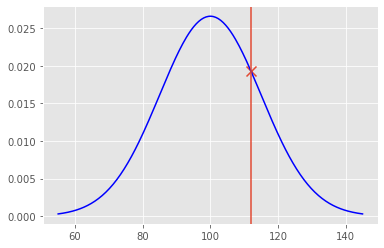

In [28]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

mu = 100
sigma = 15
x_bar = 112

intelligence = stats.norm(loc=mu, scale=sigma)

fig, ax = plt.subplots()

x = np.linspace(mu-3*sigma, mu+3*sigma, 250)
ax.plot(x, intelligence.pdf(x), color='blue' )
ax.scatter(x_bar, intelligence.pdf(x_bar), marker='x', s=100)
ax.axvline(x_bar);


''

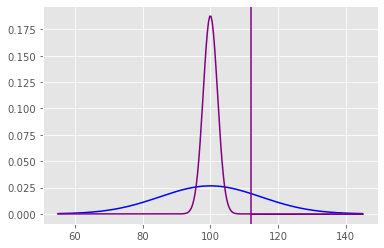

In [51]:
intelligence_sample = stats.norm(mu, sigma/np.sqrt(n))


fig, ax = plt.subplots()

x = np.linspace(mu-3*sigma, mu+3*sigma, 250)
ax.plot(x, intelligence.pdf(x), color='blue' )
ax.plot(x, intelligence_sample.pdf(x), color='purple' )
ax.axvline(x_bar, c='purple')
# ax.scatter(x_bar, intelligence.pdf(x_bar), marker='x', s=100, color='purple')
ax.fill_between(x, intelligence_sample.pdf(x), where=x>x_bar, color='purple')
;


In [42]:
1 - intelligence_sample.cdf(x_bar)

7.708628957381336e-09

In [34]:
n = 50
z_score = (x_bar - mu)/ (sigma/np.sqrt(n))
z_score

5.656854249492381

In [41]:
stats.norm(0,1).cdf(z_score)

alpha = .05
mu = 100
xbar = 112
s = 15
n = 50
se = s/np.sqrt(50)
z = (xbar - mu)/se
pval = 1 - stats.norm().cdf(z)
z, pval, pval < alpha


(5.656854249492381, 7.708628957381336e-09, True)

''

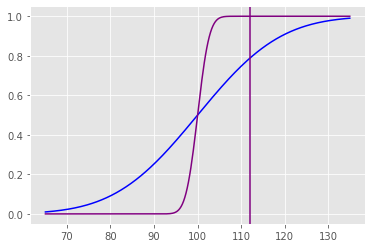

In [52]:

fig, ax = plt.subplots()

x = np.linspace(intelligence.ppf(0.01), intelligence.ppf(0.99), 250)
ax.plot(x, intelligence.cdf(x), color='blue' )
ax.plot(x, intelligence_sample.cdf(x), color='purple' )
ax.axvline(x_bar, c='purple')
# ax.scatter(x_bar, intelligence.pdf(x_bar), marker='x', s=100, color='purple')
# ax.fill_between(x, intelligence_sample.pdf(x), where=x>x_bar, color='purple')
;


Reject the Null Hypothesis

# Null Hypothesis Significance Testing

In [54]:
%matplotlib inline

import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Quick note on Normal Distribution

The normal distribution can be used as an approximation to the binomial distribution, under certain circumstances, namely: If $X \sim B(n, p)$ and if n is large and/or p is close to $\frac1 2$, then X is approximately $N(np, \sqrt {npq})$

This concept usually comes with some stipulations like "continuity corrections" but for the sake of hypothesis testing, it is something we don't need to discuss at length. 

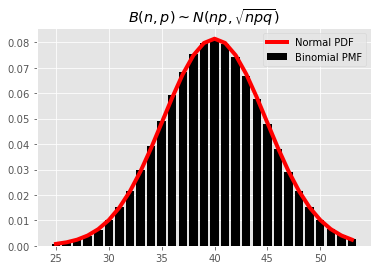

In [56]:
# A quick visual
n=100
p = 0.4


sigma = np.sqrt(n*p*(1-p))
b_dist = stats.binom(n, p)
n_dist = stats.norm((n*p), sigma)
x = range(int(n*p-sigma*3), int(n*p+sigma*3))

fig, ax = plt.subplots(1)
ax.bar(x, b_dist.pmf(x), align="center", color="k", label = 'Binomial PMF')
ax.plot(x, n_dist.pdf(x), c='r', label = 'Normal PDF', linewidth=4)
ax.set_title(r'$B(n, p) \sim N(np, \sqrt {npq})$')
plt.legend();

### The One Sample Approximate Test of Population Proportion

Earlier in the week we had an example where our friend Matt was testing how frequently he can land kickflips.  

Suppose he wants to test his hypothesis more rigorously.  Instead of skating for a day, he spends an entire month collecting data.

**Let's say** he attempts 100 kickflips a day, for a total of 3100 kickflips, and he lands 2531 of them. Remember, he does not want to move onto another trick until he can cleanly land a kickflip 80% of the time. 

So our Null Hypothesis would take on this type of distribution:

$$ \text{# Kickflips Landed} \approx Binomial(3100, 0.8) $$

In this case, our $N$ is quite large, so it's possible that we have a computer that cannot handle the exact calculations for the binomial distribution (we don't).

Luckily a binomial with large $N$ is well approximated by a Normal distribution with the appropriate mean and variance.

$$ Binomial(3100, 0.8) \approx N(3100 \times 0.8, \sqrt{3100 \times 0.8 \times 0.2}) $$

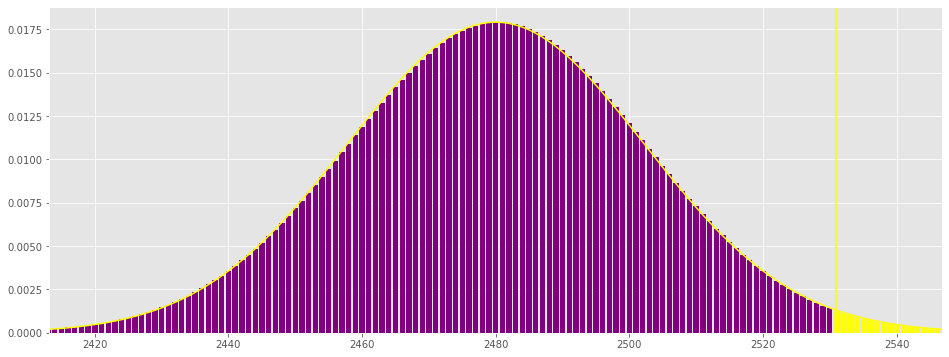

In [66]:
n = 3100
p = 0.8
k = 2531

kickflip_binomial = stats.binom(n,p)
kickflip_normal = stats.norm(n*p,np.sqrt(n*p*(1-p)))

fig, ax = plt.subplots(figsize=(16, 6))

x = np.arange(n+1)
bars = ax.bar(x, kickflip_binomial.pmf(x), color='purple', align='center')
ax.plot(x, kickflip_normal.pdf(x), color='yellow')
ax.set_xlim((n*p) - 3 *np.sqrt(n*p*(1-p)), (n*p) + 3 *np.sqrt(n*p*(1-p)))

ax.axvline(k, color='yellow')

for i in range(k, n):
    bars[i].set_color('yellow')


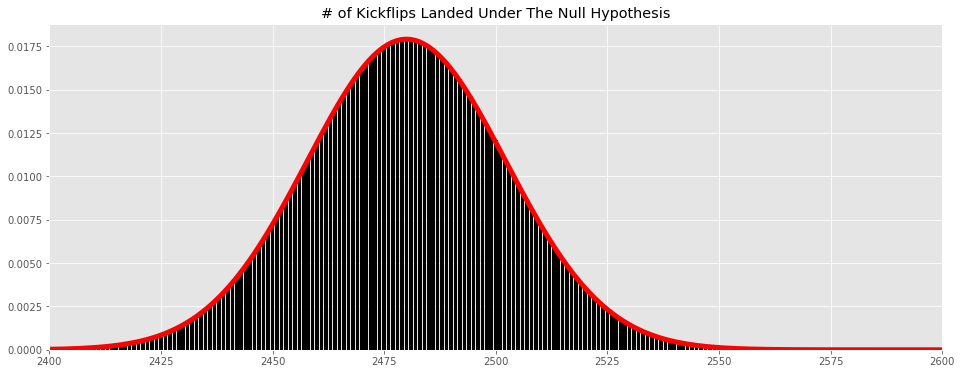

In [67]:
binomial = stats.binom(n=3100, p=0.80)
binomial_mean = 0.8 * 3100
binomial_var = 3100 * 0.8 * 0.2
normal_approx = stats.norm(binomial_mean, np.sqrt(binomial_var))
x = np.linspace(0, 3100, num=3000)

fig, ax = plt.subplots(1, figsize=(16, 6))

bar_sizes = [binomial.pmf(i) for i in range(3101)]
ax.bar(range(3101), bar_sizes, color="k", align="center")
ax.plot(x, normal_approx.pdf(x), linewidth=5, c = 'r')
ax.set_xlim(2400, 2600)

ax.set_title("# of Kickflips Landed Under The Null Hypothesis");

The approximation here is very good, so we can replace the exact Binomial distribution with the approximate Normal distribution.

```python
binomial_mean = 0.8 * 3100
binomial_var = 3100 * 0.8 * 0.2
normal_approx = stats.norm(binomial_mean, np.sqrt(binomial_var))
```

The p-value for this one-month experiment is:

What is the probability that we will see this data (2531 Kickflips) or more extreme under the null hypothesis?

$$ P(\geq \text{ 2531 Kickflips Landed} \mid \text{Null Hypothesis} ) $$

In [68]:
p_value = 1 - normal_approx.cdf(2530)
print("p-value for one month kickflip experiment: {:2.2f}".format(p_value))

p-value for one month kickflip experiment: 0.01


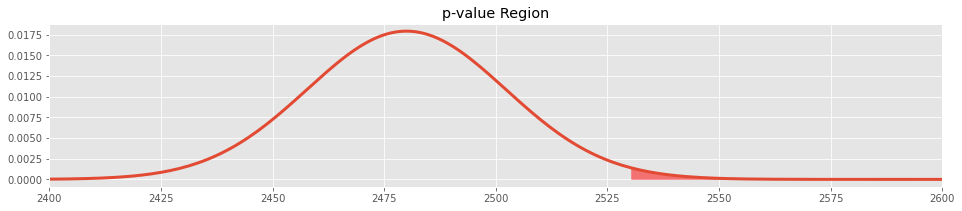

In [69]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.plot(x, normal_approx.pdf(x), linewidth=3)
ax.set_xlim(2400, 2600)
ax.fill_between(x, normal_approx.pdf(x), 
                where=(x >= 2530), color="red", alpha=0.5)
ax.set_title("p-value Region");

The month of practice has made Matt much more confident in his skill. He should definitely move on to another trick.

The approximate test for a [population proportion](https://en.wikipedia.org/wiki/Population_proportion) (the "approximate" because the Binomial distribution is approximated with a Normal) is often called the **z test for a population proportion** because the tables of tail probabilities of normal distributions that people would use to look up tail probabilities from the normal distribution back in the day were called "z-tables".

It's an amusing fact that crappy undergrad statistics textbooks still print the mandatory z-tables on their back covers.

#### **Exercise**: Matt has worked at galvanize 312 days, and rides the bus two ways each day.  He is thinking of buying a car, as observed that a bus is late often, 330 times to be exact.  He would like to purchase the car if the bus is *truly* late more than half the time.  Set up a z-test to decide if Matt should purchase the car.
<!-- 
# Your work here!
# Ridden the bus 312 times 2
# late 330 
# more than half late
n = 312*2
p = 0.5

binom = stats.binom(n,p)
binomial_var = n*p*(1-p)
normal = stats.norm(n*p, np.sqrt(binomial_var))


x = np.linspace(0, n, num=3000)
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.plot(x, normal.pdf(x), linewidth=3)
ax.set_xlim(270,370)
ax.fill_between(x, normal.pdf(x), 
                where=(x >= 330), color="red", alpha=0.5)
ax.set_title("p-value Region"); -->

Ho: the bus is late less than half the time: p<0.5 <br>
Ha: the bus is late equal to or more than half the time: p>=0.5

In [86]:
alpha = 0.05

0.08674273416073919

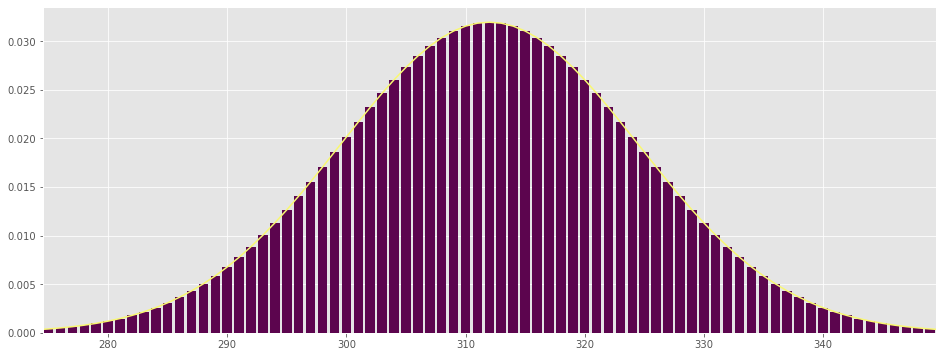

In [85]:
# Your work here!

n = 312*2 #624
k = 330
p = 0.5

mean = n*p
std = np.sqrt(n*(1-p)*p)

bus_tardiness_binomial = stats.binom(n,p)
bus_tardiness_normal = stats.norm(mean, std)

fig, ax = plt.subplots(figsize=(16,6))

x = np.arange(n+1)
ax.bar(x, bus_tardiness_binomial.pmf(x), color='#5C054E')
ax.plot(x, bus_tardiness_normal.pdf(x), color='#F9F871')
ax.set_xlim(mean-3*std, mean+3*std);

p_val = 1 - bus_tardiness_normal.cdf(k-1)
p_val


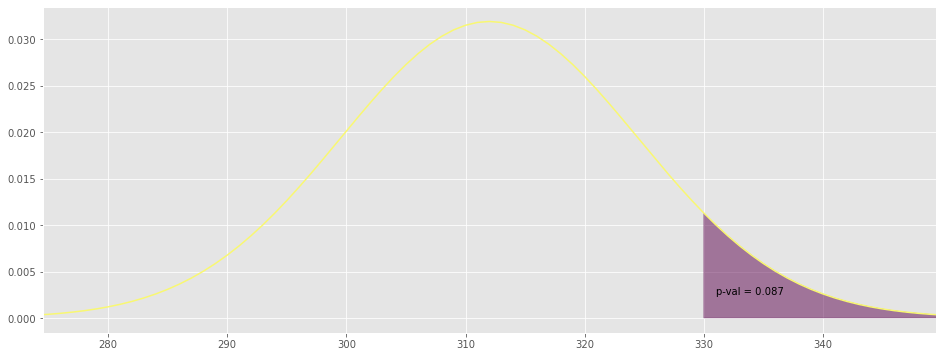

In [92]:
n = 312*2 #624
k = 330
p = 0.5

mean = n*p
std = np.sqrt(n*(1-p)*p)

bus_tardiness_binomial = stats.binom(n,p)
bus_tardiness_normal = stats.norm(mean, std)

fig, ax = plt.subplots(figsize=(16,6))

x = np.arange(n+1)
# ax.bar(x, bus_tardiness_binomial.pmf(x), color='#5C054E')
ax.plot(x, bus_tardiness_normal.pdf(x), color='#F9F871')
ax.fill_between(x, bus_tardiness_normal.pdf(x), where=(x>=k), color='#5C054E', alpha=0.5 )
ax.text(331,0.005/2,f'p-val = {p_val:.2}')
ax.set_xlim(mean-3*std, mean+3*std);

In [87]:
p_val > alpha

True

In [93]:
# fail to reject Ho
# Ho: the bus is late less than half the time: p<0.5
# He should not buy a car

## Another Example 

<img src = "https://imgix.bustle.com/rehost/2016/9/13/f56aa227-6ea1-4f8d-a995-b5c1b3911b62.jpg" width=300>

Karen claims she has a 5th sense... like ESPN or something. She's thinks she can tell when it's already raining at least 30% of the time.

Let's say we have some hypotheses:

* $H_0$: Karen can't correctly guess the weather more than 30% of the time.
* $H_a$: Karen *can* correctly guess the weather more than 30% of the time.

On a 100 days we ask Karen if it's raining and record whether or not she's correct. 

What distribution would be a good choice to model her success rate? 



In [94]:
n = 100
p = 0.3


karen_distribution = stats.binom(n,p)

Let's normalize it!

In [95]:
karen_normal = stats.norm(n*p, np.sqrt(n*p*(1-p)))

Let's say we choose $\alpha = 0.05$. 
What does this mean?


How do we know whether or not to reject the null hypothesis?



What does it mean to reject the null hypothesis?

What is a p-value?

Let's say that Karen correctly identifies that it is raining on **31 out of the 100 days**.

Do we reject the null hypothesis?


<!-- 
Confidence level of 95% If you get a p-value of greater than 0.05 then you fail to reject the null hypothesis. If it's less than 0.05 you reject the null hypothesis.

We also call alpha the false positive rate.  -->
<!-- 

We've seen good enough evidence to accept alternate hypothesis. More technically, the probability of observing the data given the null hypothesis true is less than the threshold we set. 

If we're trying to make a decision based on the hypothesis, we're going with the alternative hypothesis. 
 -->
 
<!--  # null hypothesis is p=0.3
print(1 - karen_distribution.cdf(31))

# what's the threshhold at alpha = 0.05
print(karen_distribution.ppf(0.95))
-->

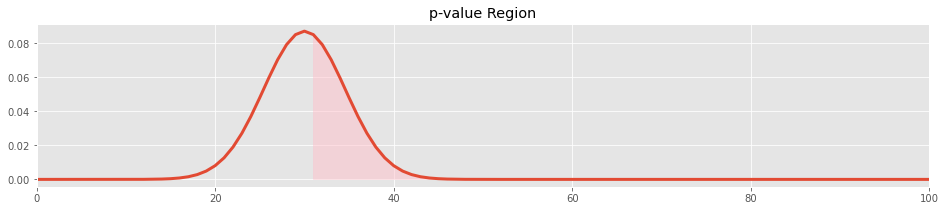

In [96]:
#Lets get a visual

fig, ax = plt.subplots(1, figsize=(16, 3))

ax.plot(x, karen_normal.pdf(x), linewidth=3)
ax.set_xlim(0, 100)
ax.fill_between(x, karen_normal.pdf(x), 
                where=(x >= 31), color="pink", alpha=0.5)
ax.set_title("p-value Region");

In [98]:
k = 31
1 - karen_normal.cdf(k-1)

0.5

## Two Sample Test

Cady (it's pronounced like Katie) thinks she's better at identifying the weather than Karen. 

* $H_0$: Cady can not identify weather better than Karen ; 
* $H_a$: Cady can identify weather better than Karen; 


Karen correctly guessed **31 out of 100 days**, and Cady correctly guesses **40 out of 100 days**. 



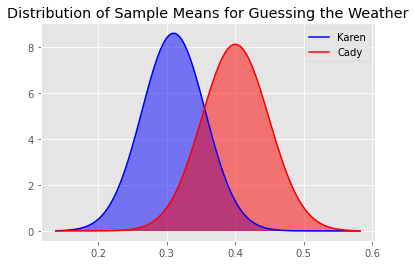

In [99]:
n=100
karen_proportion = 0.31
cady_proportion = 0.40

# sampling distribution
# We do this because the sampling mean and the population mean are the same... think back to 
karen_sample_mean = karen_proportion
cady_sample_mean = cady_proportion


karen_sd = np.sqrt(karen_proportion * (1-karen_proportion))
cady_sd = np.sqrt(cady_proportion * (1-cady_proportion))
karen_sample_mean_sd = karen_sd / np.sqrt(n)
cady_sample_mean_sd = cady_sd / np.sqrt(n)

fig,ax = plt.subplots()


karen = stats.norm(karen_sample_mean, karen_sample_mean_sd)
cady = stats.norm(cady_sample_mean, cady_sample_mean_sd)

support = np.linspace(karen.ppf(0.0001), cady.ppf(0.9999), 100)
karen_pdf = karen.pdf(support)
cady_pdf = cady.pdf(support)

ax.plot(support, karen_pdf, color='blue', label='Karen')
ax.fill(support, karen_pdf, color='blue', alpha=0.5)
ax.plot(support, cady_pdf, color='red', label='Cady')
ax.fill(support, cady_pdf, color='red', alpha=0.5)
ax.legend()
ax.set_title("Distribution of Sample Means for Guessing the Weather");

## How do we test this hypothesis?!

We can use a t-test. There are two options for us, the Student's t-test and the Welch t-test.

For the Student's t-test, the t statistic is defined as:
$$t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{\sqrt {{\frac {s_{X_{1}}^{2}+s_{X_{2}}^{2}}{n}}}}}$$
In this case we're assuming that the sample size is the same for both groups. There are adjustments that can accommodate different sample sizes.

For the Welch t-test, the t statistic is defined as:
$$t=\frac{\overline {X}_{1}-\overline {X}_{2}}{\sqrt{{s_{1}^{2} \over N_{1}} + {s_{2}^{2} \over N_{2}}}}$$

$\overline{X}$ is a sample mean.

$s$ is a sample standard deviation.

$N$ is a sample size.

The t distribution has one parameter, $\nu$ for degrees of freedom. 

$${\nu \approx \frac{{\left({s_{1}^{2} \over N_{1}}+{s_{2}^{2} \over N_{2}}\right)^{2}}}{{\quad {s_{1}^{4} \over N_{1}^{2}\nu _{1}}\;+\;{s_{2}^{4} \over N_{2}^{2}\nu _{2}}\quad }}}$$

Buuuuuut.... we don't need to code this out. We'll just use stats.ttest(sample_1, sample_2)

The Student's t requires that we assume the two samples have equal variance.
The Welch's t requires that we assume the two samples are normally distributed. 

The Mann Whitney U test instead finds the probability that if you were to randomly sample from each population, the probability that one sample would be larger than the other. 

### This is one area of stats where it's not very important to know the formulas, and it's ok to just know how to code it.

In [102]:
n=100
karen_proportion = 0.31
cady_proportion = 0.40

karen_correct_guesses = [1]*int(n*karen_proportion)
karen_incorrect_guesses = [0]*int(n*(1-karen_proportion))

In [103]:
n=100
karen_proportion = 0.31
cady_proportion = 0.40

# In python when you multiply a list by an integer, it repeats the list n times. 
# This is different from broadcasting. In numpy arrays, if you multiply an array by an integer
# you will have an array of the same length, where each element is multiplied by that integer.
# np.repeat is similar to this list multiplication.
# We're coding correct guesses as a 1, and incorrect as a 0. 
karen_correct_guesses = [1]*int(n*karen_proportion)
karen_incorrect_guesses = [0]*int(n*(1-karen_proportion))

# Here we're making use of how in python adding two lists together concatenates them. 
karen_sample = np.array(karen_correct_guesses + karen_incorrect_guesses)
cady_sample = np.array([1]*int(n*cady_proportion) + [0]*int(n*(1-cady_proportion)))

# ttest in scipy is two sided.
print("Student's t-test:")
print(stats.ttest_ind(karen_sample, cady_sample))
print()
print("Welch's t-test:")
print(stats.ttest_ind(karen_sample, cady_sample, equal_var=False))
print()
# 
print("Mann-Whitney U test:")
print(stats.mannwhitneyu(cady_sample, karen_sample, alternative = 'two-sided'))

# For one sided t test divide pvalue by 2. 

Student's t-test:
Ttest_indResult(statistic=-1.329168423470514, pvalue=0.18532193488397375)

Welch's t-test:
Ttest_indResult(statistic=-1.3291684234705141, pvalue=0.18532698552843008)

Mann-Whitney U test:
MannwhitneyuResult(statistic=5450.0, pvalue=0.18512427928332797)


We reject if the p-value is lower than alpha. So here we're going to fail to reject. 

I would suggest using the U test here. 

# Extra Resources

## Non-Parametrics: Mann-Whitney Signed Rank Test

The [Mann-Whitney U-test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) is a modern alternative to the classical Student's and Welch's t-test that makes good use of modern computing power.  It makes **no** distributional assumptions (unlike the t-test, which assumes the populations are normal), and can always be used instead.

### Rank Sums and the Test Statistic

Let's go back to our example of Matt and Nick competing to kickflip higher.

In [106]:
matt_heights = kickflip_binomial.rvs(50)
nick_heights = kickflip_binomial.rvs(50)

[Text(0, 0, 'Matt'), Text(0, 0, 'Nick')]

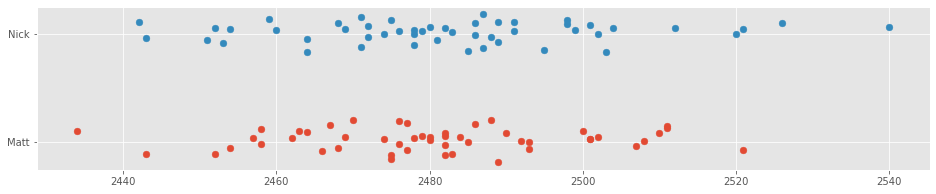

In [107]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(matt_heights, np.repeat(0, len(matt_heights)) + np.random.normal(0, 0.1, len(matt_heights)), s=45)
ax.scatter(nick_heights, np.repeat(1, len(nick_heights)) + np.random.normal(0, 0.1, len(matt_heights)), s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Matt", "Nick"])

The idea of the Mann-Whitney test is to view this as a competition.  We let each of Nick's kickfips compete against all of Matt's kickflips, and see how many times it wins (i.e. how many of Matt's kickflips it beats).  We then add these number of wins up over all of Nick's kickflips.

In [ ]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

In [ ]:
nick_wins = count_winning_pairs(nick_heights, matt_heights)
matt_wins = count_winning_pairs(matt_heights, nick_heights)
print("Number of Nick Wins: {}".format(nick_wins))
print("Number of Matt Wins: {}".format(matt_wins))

Notice that the total number of wins is just the total number of comparisons between one of Matt's kickflips and one of Nicks

In [ ]:
print("Total Number of Wins: {}".format(nick_wins + matt_wins))
print("Total Number of Comparisons: {}".format(
    len(nick_heights)*len(matt_heights)))

The total number of wins we calculated above is called the **Mann-Whitney U Statistic**, or the **Rank Sum Statisitic**.

### The U-Test

To test the hypothesis that Nick is better than Matt, we need to adopt a Null hypothesis.  The Null for the Mann-Whitney test is directly related to which competitor is better.

> $H_0$: Matt's Kickflips are equally likely to be higher than Nicks as the other way around.  I.e. 
  
  $$P(\text{Height Matt Kickflip} > \text{Height Nick Kickflip}) = 0.5$$
  
As is usual, assuming this null hypothesis is true, the rank-sum statistic assumes a known (but complicated) distribution.  This time we can't write down the distribution in any explicit way, but python can calculate p-values using it.

In [ ]:
res = stats.mannwhitneyu(nick_heights, matt_heights, alternative="greater")
print("p-value for Nick > Matt: {:2.3f}".format(res.pvalue))

We get the same result as with the t-test: Nick is clearly better than Matt.

**Discussion:** Suppose you don't have access to a library to calculate the distribution of some statistic under the null hypothesis. How would you calculate p-values?

## Mathematical Properties of Hypothesis Tests

The logic of hypothesis testing can seem awkward and silly when first encountered, and the great number of individual hypothesis tests you need to learn to "speak the language" can be overwhelming.  Hopefully our examples have made the idea clear and intuitive.

Let's now turn to some higher level properties of hypothesis tests.

### The Distribution of p-values Under the Null Hypothesis

Fisher gave the first definition of **p-value**, his original intention was only to devise some measure of **strength of evidence** for a scientific hypothesis.

The idea of a *rejection threshold* came later, from Neyman–Pearson.  Their idea was to **control the rate of false scientific discoveries**.

To explain this, we need to study the distribution of p-values under the null hypothesis.

Suppose we are studying a question, and the null hypothesis is **actually true**.  We collect some data, and compute the p-value of this data under the null hypothesis.  The question we want to address is **how do the computed p-values behave probabilistically?**

That is, drawing a different sample will result in a different p-value, how are these p-values distributed with respect to different samples?

**Discussion:** Let's brainstorm.  Assuming the Null Hypothesis is **actually true** in some situations, what should be the distribution of p-values we observe?

The best way to do this is to construct a simulation, let's write a function that runs a (one-tailed) one sample z-test on data sampled from the null hypothesis distribution, and returns the p-value of the sampled data.

In [ ]:
def simulate_one_sample_z_test(n_simulations, sample_size=100, mu=0.0, sigma=1.0):
    normal = stats.norm(mu, sigma)
    sampling_distribution = stats.norm(mu, sigma / np.sqrt(sample_size))
    p_values = []
    for _ in range(n_simulations):
        sample = normal.rvs(sample_size)
        sample_mean = np.mean(sample)
        #sample_variance = np.var(sample)
        p_value = 1 - sampling_distribution.cdf(sample_mean)
        p_values.append(p_value)
    return p_values

Now let's run many simulations, and draw a histogram of the p-values

In [ ]:
p_values = simulate_one_sample_z_test(10**5)

fig, ax = plt.subplots(1, figsize=(16, 4))
_ = ax.hist(p_values, bins=100, alpha=0.75, density=True, color="grey")
ax.set_title("Distribution of p-values Under the Null Hypothesis")

**The p-values from a properly done hypothesis test, in the situation that the null hypothesis is true, are uniformly distributed between 0 and 1**.

### Controlling the False Positive Rate

The fact above gives some insight into the idea behind the rejection threshold $\alpha$.

Recall that we set a rejection threshold *before* running the experiment, and it is related to the weight of evidence we require before rejecting the null hypothesis.  I.e., we reject the null hypothesis when our computed p-value is less than our rejection threshold.

In the situation where the **null hypothesis is actually true**, setting a rejection threshold of, say, $0.05$ ensures that we will **only falsely reject the null hypothesis 5% of the time**.  Falsely rejecting the null hypothesis is called a **false positive**, or a **type one error**.

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 4))
_, _, patches = ax.hist(p_values, bins=100, alpha=0.75, density=True, color="grey")
for i in range(6):
    patches[i].set_color("green")
    
ax.set_title("False Positive p-values")

The green bars are the tests in our simulation that falsely reject the null hypothesis.

#### The Repeated Experiment Philosophy

> If we repeatedly and properly do a hypothesis test with rejection threshold $\alpha$ in a situation where our research hypothesis is **false**, then we will only **falsely conclude that it is true** at a rate of $\alpha$. 

Although the repeated experiment philosophy is often stated as the basis for hypothesis testing, it is actually **not** how hypothesis testing is used.  A more accurate philosophy is the

#### Worst Case Long Term False Positive Rate

> In the worst case situation that **all of our scientific hypothesis are false**, scientists using a rejection threshold of $\alpha$ for their experiments will have, in the long term, a false positive rate of $\alpha$.

**Discussion:** Why is the second interpretation much more reasonable than the first?

**Note:** Failing to reject the null hypothesis when the scientific hypothesis is **true** is called a **false negative** or a **type two error**.

Studying the type two error rate takes some new concepts (mainly statistical power), which will be the subject of tomorrow's lesson.

### Multiple Testing: The Problem

Suppose I am considering writing a paper for the **American Journal of Skateboarding Research**.  I have collected data about kickflips in various situations, different terrain, different weather, different shoes, different warmup routines.  I have various questions I would like to ask of this data:

  - Does using a crisp, new board increase the height of kickflips?
  - Do dry, sunny days increase the height of kickflips?
  - Do broken in (as opposed to new) shoes increase the height of kickflips?
  - Does an aerobic warmup routine increase the height of kickflips?
  
Suppose that 

  - All my alternative hypotheses are, in reality, false. 
  - I plan to test all these hypotheses using my collected data, and write a paper in **AJSR** if I get a positive result for any of them.
  
**Question:** If I perform each of these four separate tests at a threshold of $0.05$, what is the true rate at which I reject **at least one** of these hypotheses and publish a false paper in **AJSR**?

The calculation here is a standard probabilistic argument.

  - The rate I falsely reject a single hypothesis is $\alpha$.
  - The rate I do **not** falsely reject a single hypothesis is $1 - \alpha$.
  - The rate I do **not** falsely reject **each and every one** of the hypotheses is $(1 - \alpha)^4$.
  - The rate I **do** falsely reject **at least one** of the hypotheses is $1 - (1 - \alpha)^4$.

In [ ]:
combined_false_positive_rate = 1 - (1 - 0.05)**4

print("True combined false positive rate: {:2.2f}".format(combined_false_positive_rate))

Let's look at this another way.  Suppose that the four p-values we get are $p_1, p_2$, $p_3$, and $p_4$.  Then we falsely reject the combined hypothesis whenever at least one of the p-values is less than $0.05$

$$ min(p_1, p_2, p_3, p_4) < 0.05 $$

To keep the false positive rate under control, we would need this to happen only $5\%$ of the time.

We can re-do our simulation and see how often a composite of three hypotheses is falsely rejected:

In [ ]:
p_values = simulate_one_sample_z_test(4*10**5)
p_values_combined = np.array([min(w, x, y, z) for w, x, y, z in 
                              zip(p_values[::4], p_values[1::4], p_values[2::4], p_values[3::4])])

fig, ax = plt.subplots(1, figsize=(16, 4))
_, _, patches = ax.hist(p_values_combined, bins=100, alpha=0.75, density=True, color="grey")
for i in range(6):
    patches[i].set_color("green")
    
ax.set_title("False Positive p-values")

In [ ]:
combined_false_positive_rate = np.sum(p_values_combined <= 0.05) / float(len(p_values_combined))
print("Combined False Positive Rate: {:2.2f}".format(combined_false_positive_rate))

So about 18% of the time, we will end up publishing a false paper.  This is **BAD**.

### Bonferroni Correction

The **Bonferroni Correction** is a popular way to rectify the over testing issue.

Suppose we want to test a combined hypothesis as a threshold of $\alpha$.  The bonferroni correction procedure then tests each of the individual hypotheses at a threshold of

$$ \alpha_\text{Bonferroni} = \frac{\alpha}{\text{# of Hypotheses in Combined Hypothesis}} $$

Let's check that this fixes the issue in our simulation.

In [ ]:
combined_false_positive_rate_corrected = np.sum(
    p_values_combined <= 0.05 / 4) / float(len(p_values_combined))
print("Combined False Positive Rate: {:2.2f}".format(combined_false_positive_rate_corrected))

### Mutiple Testing Over Time: Discussion

You're studying the impact of changing the layout of your skateboarding website.  The website is intended to map out the skating spots in cities around the country, user's can add spots, photos, and comments.

You've made some changes to the comment system, and are hoping that it will draw more forum comments from users.

Your plan to test this is to split users of your site into two groups, one group will always see the new layout, and one will always see the old.  You plan to run the site this way for two months, and in the end test whether the users with the new layouts generated more forum comments than those under the old layouts.

Let's simulate some data under the **truth** that the new website is **slightly worse**.

In [ ]:
np.random.seed(66)

old_forum_comment_rate = 0.2   # Old Website: Better.
new_forum_comment_rate = 0.18  # New Website: Slightly worse.
commenters_per_day = stats.poisson(2)

# Same Number of Commenters for Each
commenters_per_day_old = commenters_per_day.rvs(2*31)
commenters_per_day_new = commenters_per_day.rvs(2*31)

# 
comments_per_day_old = [
    stats.binom(commenters, old_forum_comment_rate).rvs(1)
    for commenters in commenters_per_day_old]
comments_per_day_new = [
    stats.binom(commenters, new_forum_comment_rate).rvs(1)
    for commenters in commenters_per_day_new]

cumlative_comments_per_day_old = np.cumsum(comments_per_day_old)
cumlative_comments_per_day_new = np.cumsum(comments_per_day_new)

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 4))

x = np.arange(1, 2*31 + 1)
ax.plot(x, cumlative_comments_per_day_old, label="Old Layout")
ax.plot(x, cumlative_comments_per_day_new, label="New Layout")
ax.legend()
ax.set_xlabel("Day")
ax.set_ylabel("Cumulative Number of Comments")

ax.set_title("Cumulative Number of Comments over Two Months")

The data we collected makes it look like the new website is **better**.

In [ ]:
rate_of_comments_new_layout = np.sum(comments_per_day_new) / float(np.sum(commenters_per_day_new))
rate_of_comments_old_layout = np.sum(comments_per_day_old) / float(np.sum(commenters_per_day_old))

print("Rate of comments, new layout: {:2.2f}".format(rate_of_comments_new_layout))
print("Rate of comments, old layout: {:2.2f}".format(rate_of_comments_old_layout))

But our testing framework tells us the truth, we do not reject the null that the new website is not as good as the old.

In [ ]:
def two_sample_test_of_population_proportions(commentators_new, comments_new, commentators_old, comments_old):
    difference_in_sample_proportions = (comments_new / float(commentators_new)) - (comments_old / float(commentators_old))
    overall_proportion = (comments_new + comments_old) / float(commentators_new + commentators_old)
    test_varaince = ((comments_new + comments_old) * overall_proportion * (1 - overall_proportion)) / (commentators_new + commentators_old)
    test_distribution = stats.norm(0, np.sqrt(test_varaince))
    p_value = 1 - test_distribution.cdf(difference_in_sample_proportions)
    return p_value

In [ ]:
p_value = two_sample_test_of_population_proportions(
    np.sum(commenters_per_day_new), np.sum(comments_per_day_new), 
    np.sum(commenters_per_day_old), np.sum(comments_per_day_old)
)

print("p-value for full experiment: {:2.2f}".format(p_value))

Suppose that we cheated.  We looked at the data every day, and ran a hypothesis test on that days data, stopping if we ever got a significant result.

Now let's see the sequence of p-values we would get if we run the test every day.

In [ ]:
cumlative_comments_per_day_old = np.cumsum(comments_per_day_old)
cumlative_comments_per_day_new = np.cumsum(comments_per_day_new)
cumlative_commenters_per_day_old = np.cumsum(commenters_per_day_old)
cumlative_commenters_per_day_new = np.cumsum(commenters_per_day_new)

p_values = [
    two_sample_test_of_population_proportions(
        cumlative_commenters_per_day_new[i], 
        cumlative_comments_per_day_new[i],
        cumlative_commenters_per_day_old[i], 
        cumlative_comments_per_day_old[i]
    )
    for i in range(1, 2*31)
]

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.plot(range(1, 2*31), p_values)
ax.set_title("P-values Over Time")
ax.set_xlabel("Day")
ax.set_ylabel("p-value")

If we peeked at our data any time between the 10'th and 16'th day, we would have made the wrong conclusion!

In [ ]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.plot(range(1, 2*31), p_values)
ax.axvline(10, linestyle="--")
ax.axvline(16, linestyle="--")
ax.axvspan(10, 16, alpha=0.25, color='red')
ax.set_title("P-values Over Time")
ax.set_xlabel("Day")
ax.set_ylabel("p-value")

**Discussion:** What is the danger in testing every day, and stopping the experiment if a significant result is found?  Everything seemed to go ok here!

# Extra!

## Appendix: Chi Squared Tests

### Example: Linear Congruential Generators

You've been contracted to create a small game that will run on an [embedded system](https://en.wikipedia.org/wiki/Embedded_system) (think, for example, a [Tamagotchi](https://en.wikipedia.org/wiki/Tamagotchi) ).  The system does not have many resources, so you have to create your own random number generator.

After some research, you hit on a lightweight solution, a [linear congruential generator](https://en.wikipedia.org/wiki/Linear_congruential_generator).  To scope things out, you code a simple generator in python.

In [ ]:
class LinearCongruentialGenerator:
    
    def __init__(self, a, c, modulus, seed):
        self._a = a
        self._c = c
        self._modulus = modulus
        self._seed = seed
        
    def next(self):
        next_sample = (self._a * self._seed + self._c) % self._modulus
        self._seed = next_sample
        return next_sample
    
    def sample(self, n):
        L = []
        for _ in range(n):
            L.append(lcm.next())
        return np.array(L)

And lookup some parameters to use online.

In [ ]:
lcm = LinearCongruentialGenerator(48271, 0, 2**31 - 1, 1)

You want to test if you're code really works, which involves assessing the "randomness" of your generator.  

**Discussion:** How would you assess the quality of your random numbers.

Your intention in the app is to use the generator to create random six sided dice rolls, so you plan to test whether the generator is appropriate for that application.

You have a strong belief that the die is fair, as this code is based on an industry standard method, so your goal here is to detect whether the random number generator is *unfair.*

The app will only be used in small bursts of activity, so you decide to run these tests on a smallish sample.

In [ ]:
dice_rolls = lcm.sample(50) % 6
dice_freqs = np.bincount(dice_rolls)

fig, ax = plt.subplots(1, figsize=(16, 4))
ax.bar(range(1, 7), dice_freqs, align='center')

### The Chi-Squared Test for Distribution

The first step is to arrange our results into a **contingency table**, which compares the expected frequency to the observed frequency.

In [ ]:
import pandas as pd
dice_rolls_contingency_table = pd.DataFrame(
    {'expected': np.repeat(8.3, 6) , 'actual': dice_freqs}
)
print(dice_rolls_contingency_table)

The **Chi Squared Test for Distribution**, (also known as the **Chi Squared Test for Goodness of Fit** tests the hypothesis that the **actual** data was not generated from a discrete distribution which has expected frequencies as calculated.

>$H_0$: The data was generated from a discrete distribution with the given expected frequencies.

> $H_{a}$: The data was *not* generated from a discrete distribution with the given expected frequencies.

In out situation, a shorter way to express this is

>$H_0$: The data generated from the random number generator is consistent with a fair die.

> $H_{a}$: The data generated from the random number generator is not consistent with a fair die.

**Note** a point of awkwardness here.  We would like to conclude the die is fair, so really our antagonistic hypothesis should be that the die is unfair.  But assuming the die is unfair does not let us create a probabilistic model for the situation under the null.

Unfortunately, this is the common logic of Chi squared tests for distribution.

#### Assemble the Contingency Table

We've already done this step.  Good to go.

#### Compute the Test Statistic

The first step in the Chi Squared test is to compute the following test statistic:

$$ T = \sum_i \frac{(O_i - E_i)^2}{E_i} $$

In [ ]:
def chi_squared_test_statistic(observeds, expecteds):
    numerators = (observeds - expecteds)**2
    ratios = numerators / expecteds
    return np.sum(ratios)

The logic of the Chi Squared test is that this quantity follows a certain distribution, the chi squared distribution.

#### Preform the Test

The Chi Squared distribution has one parameter, the degrees of freedom.

In [ ]:
dfs = [1, 2, 3, 4, 5]
x = np.linspace(0, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))

for df in dfs:
    chisq = stats.chi2(df)
    ax.plot(x, chisq.pdf(x), linewidth=2,
            label="Degree of Freedom: {}".format(df))
ax.set_ylim(0, 0.5)
ax.legend()

The Chi squared test provides the degrees of freedom as:
    
$$ \text{Number of Cells in the Contingency Table} - \text{Number of Parameters in Distribution} + 1$$

So let's apply this to our contingency tables

#### The Dice Rolls

In this case, our degrees of freedom for the Chi Squared distribution is

$$ 6 - 1 + 1 = 6 $$

And the test statistic is

In [ ]:
T = chi_squared_test_statistic(dice_rolls_contingency_table.actual, 
                               dice_rolls_contingency_table.expected)

So our p-value for the test is

In [ ]:
test_distribution = stats.chi2(6)
p_value = 1 - test_distribution.cdf(T)
print("p-value for dice rolls: {:2.2f}".format(p_value))

Looks like this experiment does *not* give us enough evidence to conclude that our random number generator produces fair rolls.  Looks like we should do more research.

**Exercise:** Do the other test, of consecutive differences.

## Appendix: Secret Code to Find Random Seed that Rejects In Forum Example

In [ ]:
def reject_on_day(seed, burn_in=0):
    np.random.seed(seed)

    old_forum_comment_rate = 0.2   # Old Website: Better.
    new_forum_comment_rate = 0.18  # New Website: Slightly worse.
    commenters_per_day = stats.poisson(2)

    # Same Number of Commenters for Each
    commenters_per_day_old = commenters_per_day.rvs(2*31)
    commenters_per_day_new = commenters_per_day.rvs(2*31)

    # 
    comments_per_day_old = [
        stats.binom(commenters, old_forum_comment_rate).rvs(1)
        for commenters in commenters_per_day_old]
    comments_per_day_new = [
        stats.binom(commenters, new_forum_comment_rate).rvs(1)
        for commenters in commenters_per_day_new]

    cumlative_comments_per_day_old = np.cumsum(comments_per_day_old)
    cumlative_comments_per_day_new = np.cumsum(comments_per_day_new)

    p_values = np.array([
        two_sample_test_of_population_proportions(
            cumlative_commenters_per_day_new[i], cumlative_comments_per_day_new[i],
            cumlative_commenters_per_day_old[i], cumlative_comments_per_day_old[i]
        )
        for i in range(1, 2*31)
    ])
    
    return any(p_values[burn_in:] <= 0.05)

In [ ]:
for seed in range(1, 50000):
    if reject_on_day(seed, burn_in=15):
        break

In [ ]:
seed

In [ ]:
import numpy as np
np.random.seed(222)

In [ ]:
np.random.uniform(0, 1, size=50)

In [ ]:
np.random.seed(222)
np.random.uniform(0, 1, size=50)